## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)

In [2]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import statsmodels.api as sm
import json
import os
import urllib2
from scipy import stats

url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Dexter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [3]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

In [4]:
#REMOVE
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

## Exploratory phase

In [5]:
#let's see what is in the data
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix (allmales, s=300, figsize=(16, 16), diagonal='kde')
#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
#print allmales['all'].columns
print allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [6]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/Users/Dexter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


In [7]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/Dexter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
M_income = pd.DataFrame({'all': allmales['all']['Median income'], 'white': allmales['white']['Median income'], 'black': allmales[
                         'black']['Median income'], 'hispanic': allmales['hispanic']['Median income'], 'asian': allmales['asian']['Median income']})

F_income = pd.DataFrame({'all': allfemales['all']['Median income'], 'white': allfemales['white']['Median income'], 'black': allfemales[
                        'black']['Median income'], 'hispanic': allfemales['hispanic']['Median income'], 'asian': allfemales['asian']['Median income']})

M_income.head()

,all,asian,black,hispanic,white
0,NaN,NaN,NaN,NaN,NaN
1,35228,40153,24855,25411,40122
2,39903,45926,30389,26914,44882
3,40298,45950,30686,27017,45554
4,19557,30916,10786,19988,20445


##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

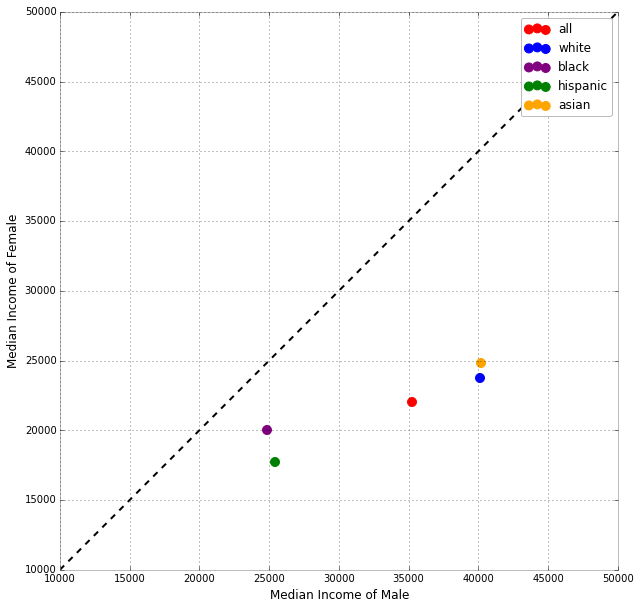

In [9]:
ax = pl.figure(figsize=(10,10))
pl.scatter(M_income['all'][1],F_income['all'][1],color='red',label='all',s=80)
pl.scatter(M_income['white'][1],F_income['white'][1],color='blue',label='white',s=80)
pl.scatter(M_income['black'][1],F_income['black'][1],color='purple',label='black',s=80)
pl.scatter(M_income['hispanic'][1],F_income['hispanic'][1],color='green',label='hispanic',s=80)
pl.scatter(M_income['asian'][1],F_income['asian'][1],color='orange',label='asian',s=80)
pl.plot([1e4,5e4], [1e4,5e4],'k--')
pl.xlim([1e4,5e4])
pl.ylim([1e4,5e4])
pl.xlabel('Median Income of Male')
pl.ylabel('Median Income of Female')
pl.legend()

### It can be clearly seen that the total median income of females is lower that of males among all races.

#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Mon, 19 Oct 2015   Prob (F-statistic):             0.0176
Time:                        00:54:45   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

/Users/Dexter/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


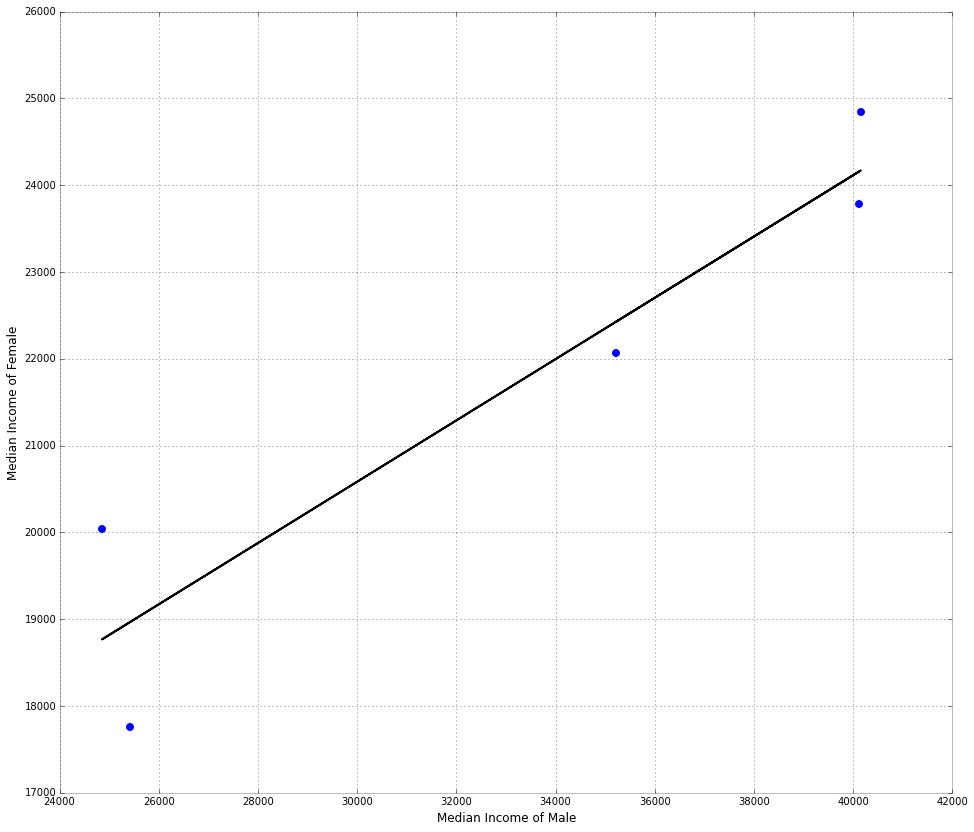

In [10]:
#print M_income.iloc[1].values

lm1 = sm.OLS(F_income.iloc[1].values,sm.add_constant(M_income.iloc[1].values)).fit()
print lm1.summary()
pl.figure(figsize=(16, 14))
pl.scatter(M_income.iloc[1],F_income.iloc[1],s=80)
pl.plot(M_income.iloc[1],lm1.predict(),'k')
pl.xlabel('Median Income of Male')
pl.ylabel('Median Income of Female')

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [26]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)

cor = stats.spearmanr(M_income.iloc[1], F_income.iloc[1])
M_income.iloc[1].std() / F_income.iloc[1].std()
beta1 = cor[0] * F_income.iloc[1].std() / M_income.iloc[1].std()
beta0 = F_income.iloc[1].mean() - beta1 * M_income.iloc[1].mean()

##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

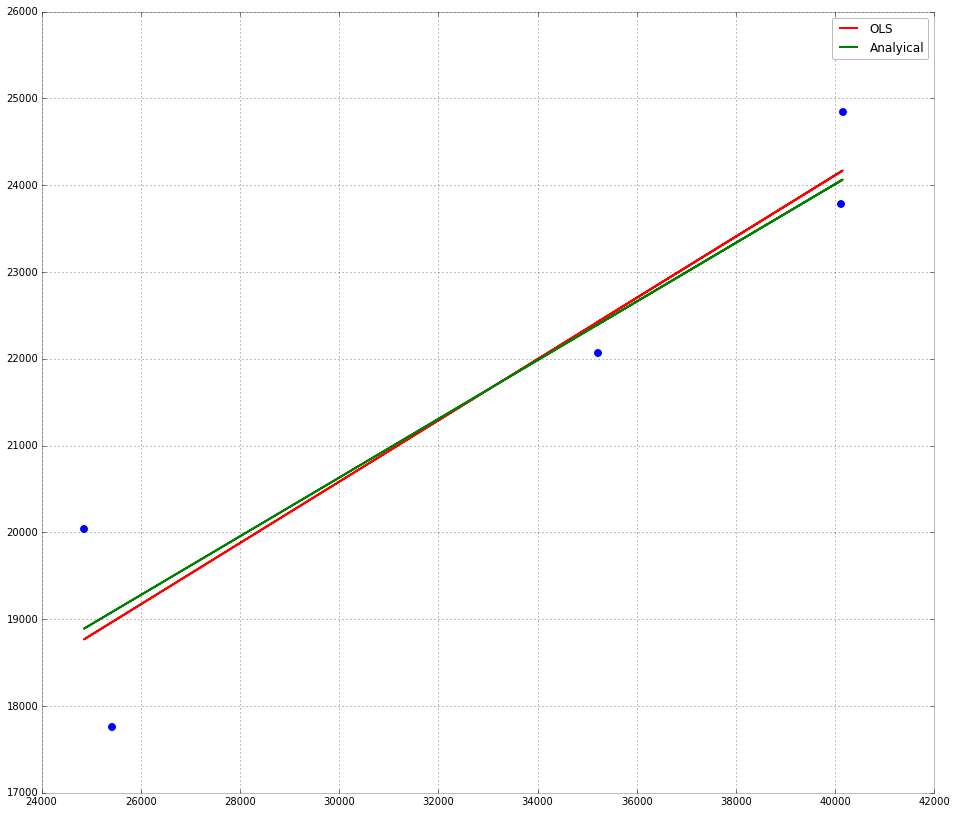

In [28]:
pl.figure(figsize=(16, 14))
pl.scatter(M_income.iloc[1],F_income.iloc[1],s=80)
pl.plot(M_income.iloc[1],lm1.predict(),'r-',label='OLS')
pl.plot(M_income.iloc[1], beta0 + M_income.iloc[1] * beta1, 'g-',label='Analyical')
#pl.xlim(-10000,50000)
#pl.ylim(-10000,50000)
pl.legend()


#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [30]:
AM_income = np.array(np.concatenate([allmales['all']['Median income'][:].values, allmales['white']['Median income'][:].values, allmales['black'][
                     'Median income'][:].values, allmales['hispanic']['Median income'][:].values, allmales['asian']['Median income'][:].values]).flatten())

AF_income = np.array(np.concatenate([allfemales['all']['Median income'][:].values, allfemales['white']['Median income'][:].values, allfemales[
                       'black']['Median income'][:].values, allfemales['hispanic']['Median income'][:].values, allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

#allmask = [np.isnan(all_males) + np.isnan(all_females)]

#all_females.mask = allmask
#all_males.mask = allmask

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        02:27:16   Log-Likelihood:                -1668.8
No. Observations:                 178   AIC:                             3342.
Df Residuals:                     176   BIC:                             3348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1493.0394    351.359      4.249      0.0

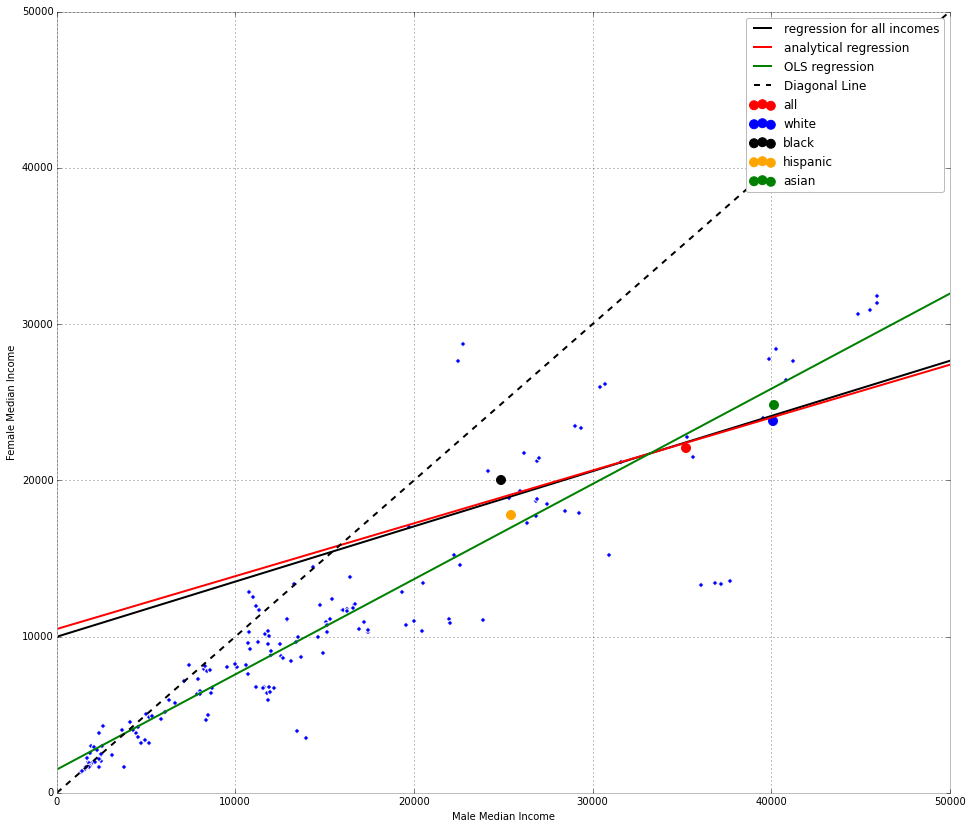

In [39]:
lm2 = sm.OLS(all_females, sm.add_constant(all_males), missing='drop').fit()
print lm2.summary()

pl.figure(figsize=(16, 14))
pl.scatter(AM_income, AF_income)
x_value = np.arange(0, 50000, 1)
pl.plot(x_value, x_value * lm1.params[1] + lm1.params[0],
        color='black', label='regression for all incomes')
pl.plot(x_value, beta0 + x_value * beta1,
        color='red', label='analytical regression')
pl.plot(x_value, x_value *
        lm2.params[1] + lm2.params[0], color='green', label='OLS regression')
pl.scatter(M_income['all'][1], F_income['all']
           [1], color='red', label='all', s=80)
pl.scatter(M_income['white'][1], F_income['white']
           [1], color='blue', label='white', s=80)
pl.scatter(M_income['black'][1], F_income['black']
           [1], color='black', label='black', s=80)
pl.scatter(M_income['hispanic'][1], F_income['hispanic']
           [1], color='orange', label='hispanic', s=80)
pl.scatter(M_income['asian'][1], F_income['asian']
           [1], color='green', label='asian', s=80)
pl.plot([0, 50000], [0, 50000], 'k--', color='black', label='Diagonal Line')
pl.xlim(0, 50000)
pl.ylim(0, 50000)
pl.xlabel('Male Median Income', size=10)
pl.ylabel('Female Median Income', size=10)
pl.legend()

### This line fit is similar and high legverage points can be found.
#### Picking the stipened to be 30,000

In [41]:
ideal_stip = 3e4 * lm2.params[1] + lm2.params[0] 
print ideal_stip

19763.6551497


### What a woman in a position where a man recieves the ideal stipend would make approximately 19764 dollar.
### Comments:
#### Among all races, it seems that Asian and White women has larger diffrence of income between within two genders.
#### I might conduct more tests (like ANOVA) to see whether there are statistical evidence to show the income differences among all races.